In [1]:
### import libraries

# for DL modeling
import torch
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [59]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [60]:
### z-score all variables except for quality

# find the columns we want to normalize (all except residual sugar)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('residual sugar')

# # z-score (written out for clarity)
# for col in cols2zscore:
#   meanval   = np.mean(data[col])
#   stdev     = np.std(data[col],ddof=1)
#   data[col] = (data[col]-meanval) / stdev

# can also do more compactly
data[data.keys()] = data[data.keys()].apply(stats.zscore)

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,3.732682e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16,8.887339e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,-3.265165e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,-7.878226e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,4.508484e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,4.508484e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,2.928190e+00


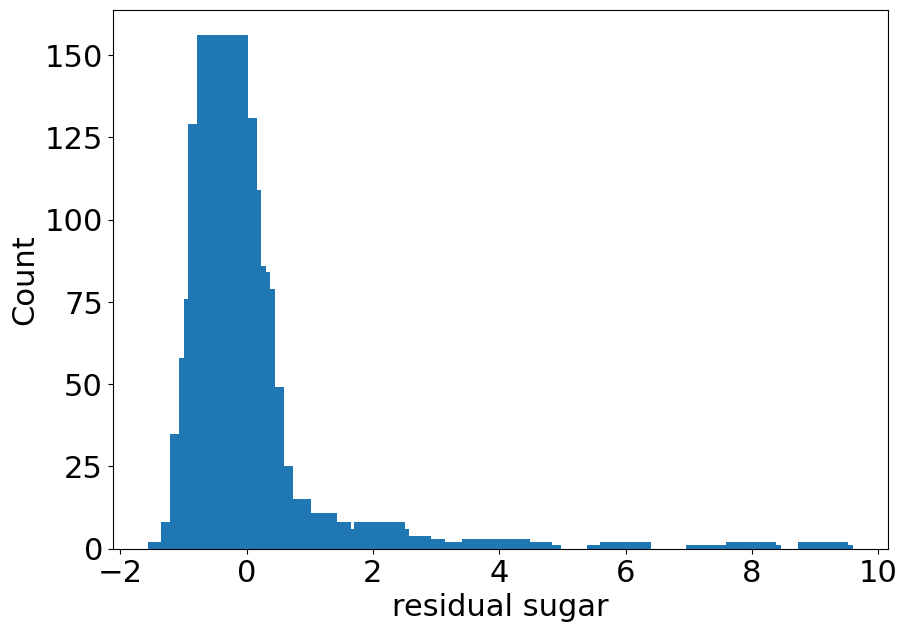

In [61]:
# distribution quality values
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22}) # increase font size in the figure

counts = data['residual sugar'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xlabel('residual sugar')
plt.ylabel('Count')
plt.show()

In [62]:
# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['residual sugar'].values ).float()

print( dataT.shape )
print( labels.shape )

# we'll actually need the labels to be a "tensor"
labels = labels[:,None]
print( labels.shape )

torch.Size([1599, 11])
torch.Size([1599])
torch.Size([1599, 1])


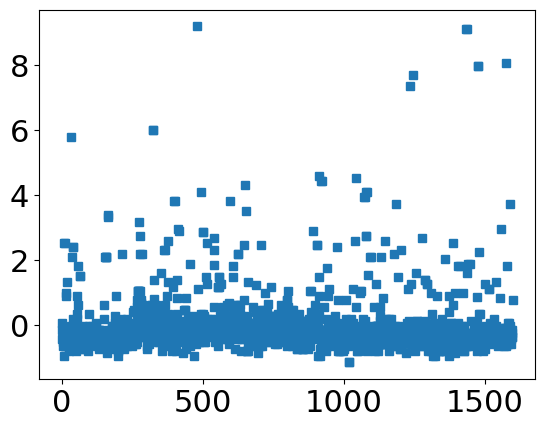

In [65]:

plt.plot(labels,'s')

In [72]:
train_dataSK, test_dataSK, train_labelsSK, test_labelsSK = train_test_split(dataT, labels)

train_data = TensorDataset(train_dataSK, train_labelsSK)
test_data = TensorDataset(test_dataSK, test_labelsSK)
# test_data.tensors[0].shape[0]
def getBatches(batch_size=64):
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
    test_loader = DataLoader(test_data, batch_size=test_data.__len__())
    return train_loader, test_loader

In [68]:
def createModel():
    ANN = torch.nn.Sequential(
        torch.nn.Linear(11,64),
        torch.nn.ReLU(),
        torch.nn.Linear(64,64),
        torch.nn.ReLU(),
        torch.nn.Linear(64,1)
    )
    learningRate = 0.01

    lossFunction = torch.nn.MSELoss() # as labels are continuous values

    optimizer = torch.optim.SGD(params=ANN.parameters(), lr=learningRate)

    return ANN, lossFunction, optimizer

In [69]:
epochs = 1000
def trainModel(train_loader, test_loader, ANN, lossFunction, optimizer):
    
    trainAcc = []
    trainLoss = []
    trainCorr = []
    trainLabels = []
    testAcc = []
    testLoss = []
    testCorr = []
    testLabels = []
    for _ in range(epochs):

        batchAcc = []
        batchLoss = []
        batchCorr = []

        for trainX, trainY in train_loader:
            yHat = ANN(trainX)

            loss = lossFunction(yHat, trainY)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append((torch.mean(((yHat > 0).float() == trainY).float()) * 100).item())
            batchLoss.append(loss.item())
            batchCorr.append(np.corrcoef(trainY.T, yHat.detach().T)[0,1])
        
        trainAcc.append(np.mean(batchAcc))
        trainLoss.append(np.mean(batchLoss))
        trainCorr.append(np.mean(batchCorr))

        testX, testY = next(iter(test_loader))
        # with torch.no_grad():
        predLabels = ANN(testX)

        testAcc.append((torch.mean(((predLabels > 0).float() == testY).float()) * 100).item())
        testLoss.append(lossFunction(predLabels, testY).item())
        testCorr.append(np.corrcoef(testY.T, predLabels.detach().T)[0,1])
    
    return trainAcc, trainLoss, testAcc, testLoss, trainCorr, testCorr
        



In [15]:
# create a 1D smoothing filter
def smooth(x,k=5):
  return np.convolve(x,np.ones(k)/k,mode='same')

In [73]:
ANN, lossFunction, optimizer = createModel()
train_loader, test_loader = getBatches()
trainAcc, trainLoss, testAcc, testLoss, trainCorr, testCorr = trainModel(train_loader, test_loader, ANN, lossFunction, optimizer)

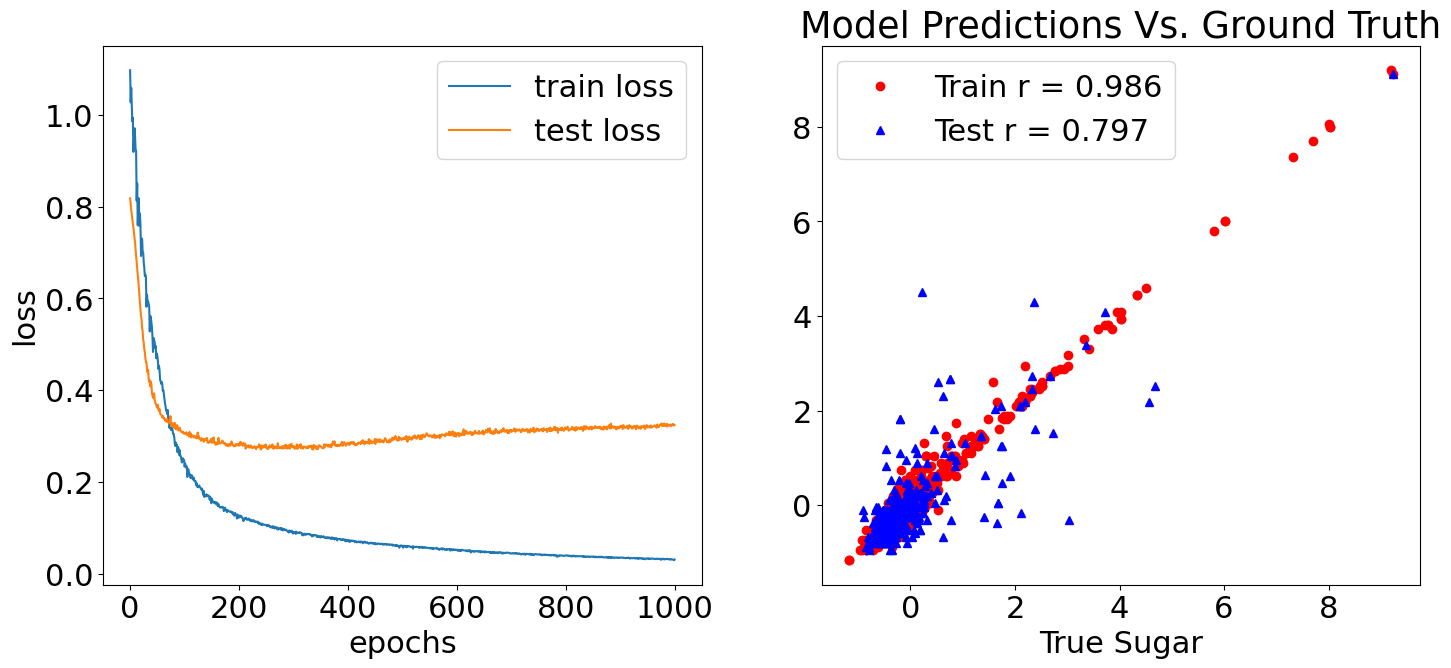

In [77]:
fig, ax = plt.subplots(1,2, figsize=(17,7))

ax[0].plot(trainLoss)
ax[0].plot(testLoss)
ax[0].legend(['train loss', 'test loss'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

yHatTrain = ANN(train_dataSK)
yHatTest = ANN(test_dataSK)

ax[1].plot(yHatTrain.detach(), train_labelsSK, 'ro')
ax[1].plot(yHatTest.detach(), test_labelsSK, 'b^')
ax[1].set_xlabel('Model-Predicted Sugar')
ax[1].set_xlabel('True Sugar')
ax[1].set_title('Model Predictions Vs. Ground Truth')

corrTrain = np.corrcoef(yHatTrain.detach().T, train_labelsSK.T)[1,0]
corrTest = np.corrcoef(yHatTest.detach().T, test_labelsSK.T)[1,0]
ax[1].legend([f'Train r = {corrTrain:.3f}', f'Test r = {corrTest:.3f}'])
plt.show()

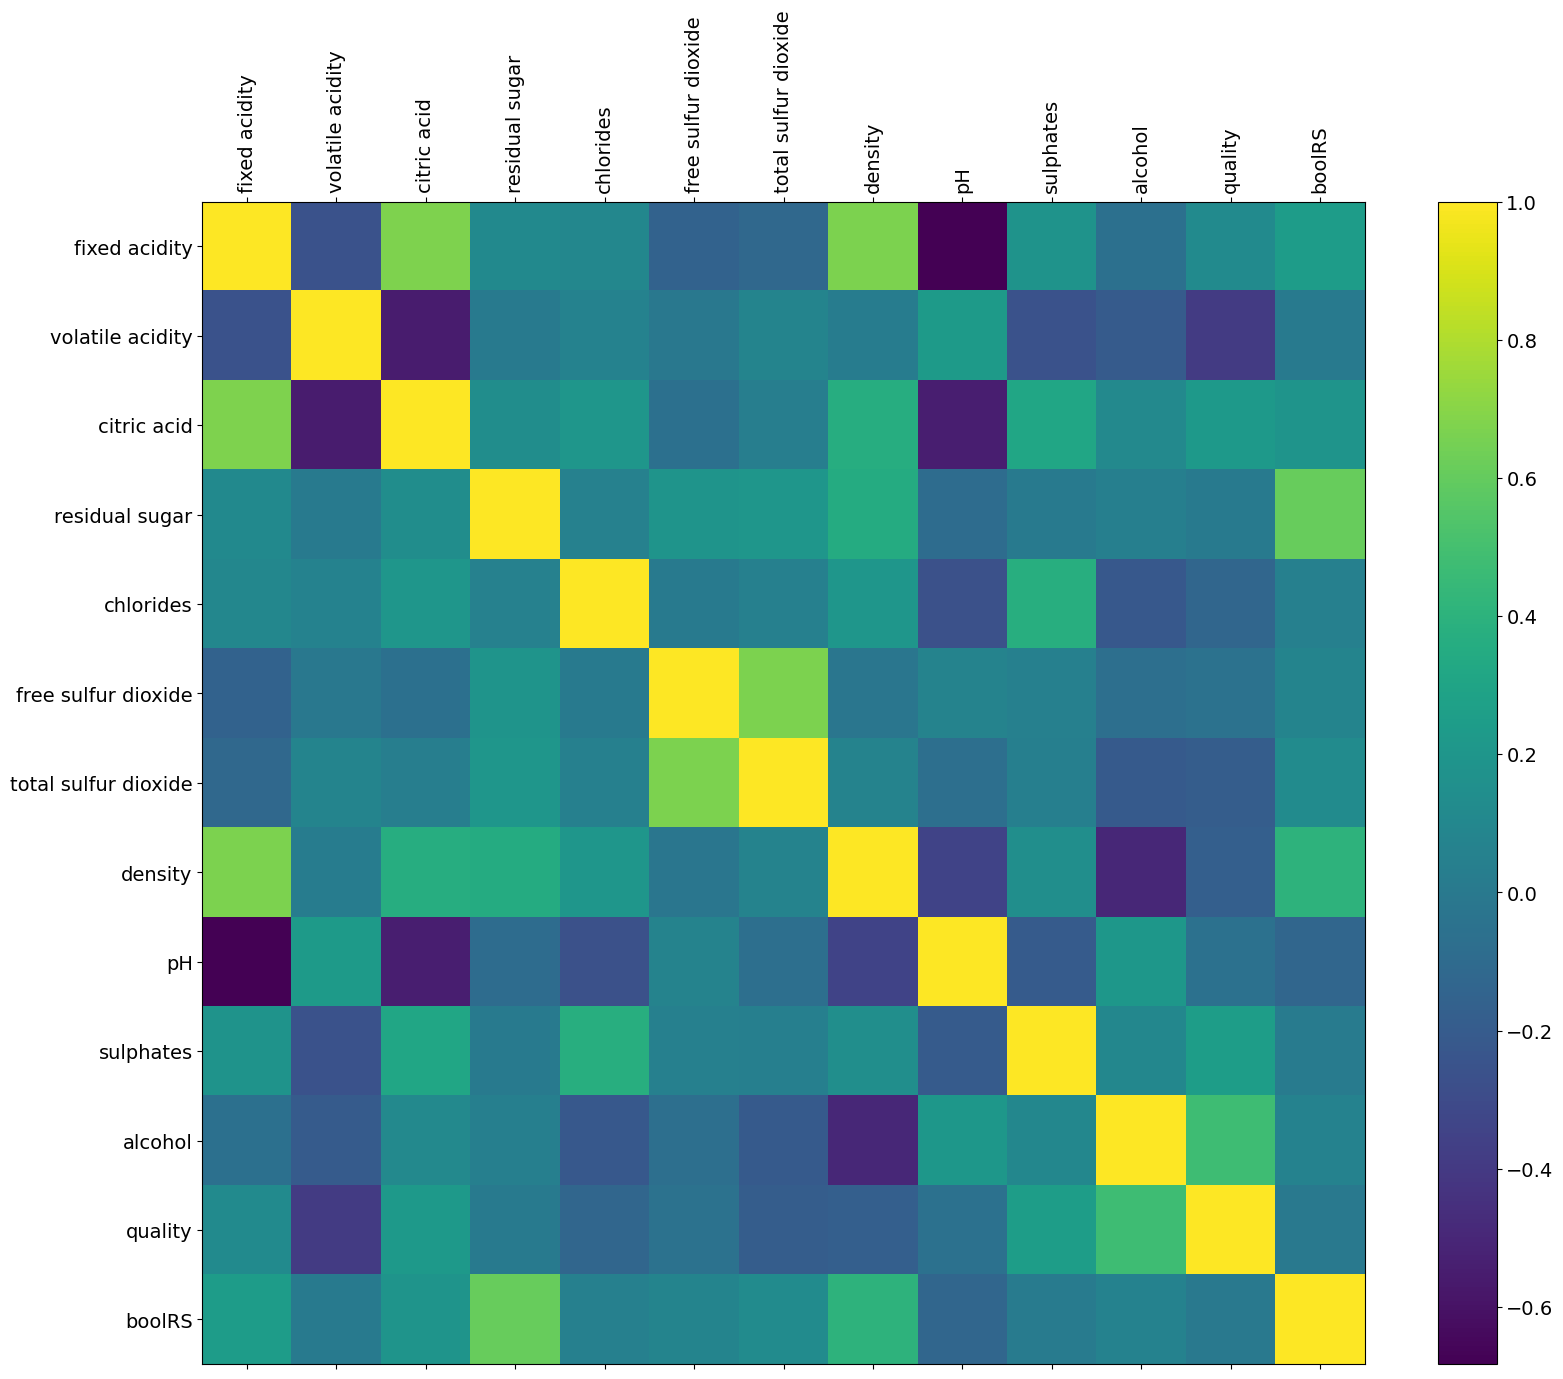

In [39]:
f = plt.figure(figsize=(19, 15))
corr = data.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=14, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

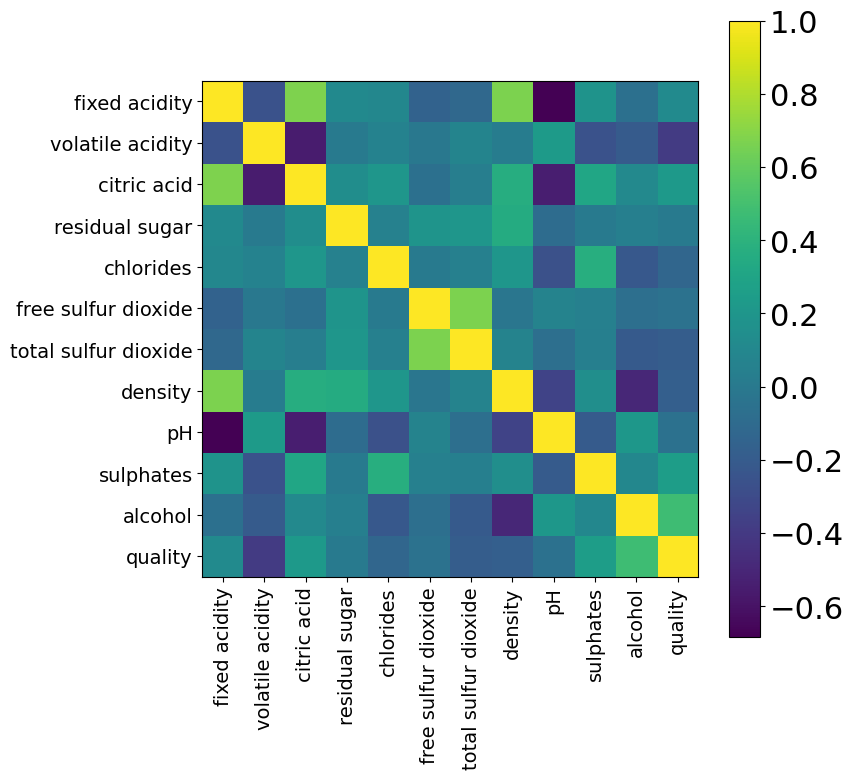

In [86]:
f = plt.figure(figsize=(8, 8))
corr = np.corrcoef(data.T)
plt.imshow(corr)
plt.xticks(range(len(data.keys())), data.keys(), fontsize=14, rotation=90)
plt.yticks(range(len(data.keys())), data.keys(), fontsize=14)
plt.colorbar()
plt.show()